In [2]:
import keras
from keras.datasets import reuters
import numpy as np

In [3]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
np.load = np_load_old

2113536/2110848 [==============================] - 2s 1us/step


In [5]:
print(len(train_data), len(test_data))
max([max(seq) for seq in train_data])

8982 2246


9999

In [8]:
print(train_data[0], train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12] 3


In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

557056/550378 [==============================] - 0s 0us/step


In [7]:
decoded_review_0 = ' '.join([reverse_word_index.get(i-3,"?") for i in train_data[0]])
print(decoded_review_0)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [9]:
def vectorize_seqs(seqs, dimension=10000):
    results = np.zeros((len(seqs),dimension))
    for i,seq in enumerate(seqs):
        results[i,seq] = 1
    return results

In [10]:
x_train = vectorize_seqs(train_data)
x_test = vectorize_seqs(test_data)

In [26]:
len(x_train)

8982

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,labels in enumerate(labels):
        results[i,labels] = 1
    return results

In [28]:
y_one_hot_train = to_one_hot(train_labels)
y_one_hot_test = to_one_hot(test_labels)

In [29]:
from keras import models
from keras import layers

In [30]:
network = models.Sequential()
network.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(46, activation = 'softmax'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
x_val = x_train[:1000]
part_x_train = x_train[1000:]
print(len(x_val),len(part_x_train))

1000 7982


In [36]:
y_val = y_one_hot_train[:1000]
part_y_train = y_one_hot_train[1000:]
print(len(y_val),len(part_y_train))

1000 7982


In [38]:
history = network.fit(part_x_train, part_y_train, epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 262us/step - loss: 0.0724 - acc: 0.9807 - val_loss: 0.0502 - val_acc: 0.9857
Epoch 2/20
7982/7982 [==============================] - 1s 82us/step - loss: 0.0425 - acc: 0.9888 - val_loss: 0.0394 - val_acc: 0.9898
Epoch 3/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.0333 - acc: 0.9911 - val_loss: 0.0355 - val_acc: 0.9905
Epoch 4/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.0271 - acc: 0.9925 - val_loss: 0.0332 - val_acc: 0.9911
Epoch 5/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.0225 - acc: 0.9936 - val_loss: 0.0322 - val_acc: 0.9909
Epoch 6/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.0186 - acc: 0.9945 - val_loss: 0.0305 - val_acc: 0.9913
Epoch 7/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.0157 - acc: 0.9954 - val_loss: 0.0302 - val_acc: 0.9915
Epoch 

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [40]:
from matplotlib import pyplot as plt

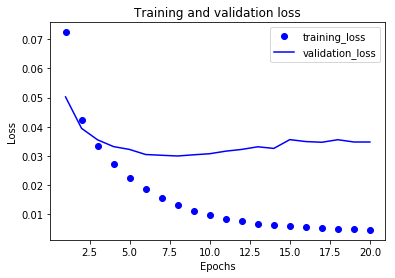

In [41]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,20+1)
plt.plot(epochs,loss_values, "bo", label = "training_loss")
plt.plot(epochs,val_loss_values, "b", label = "validation_loss")
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

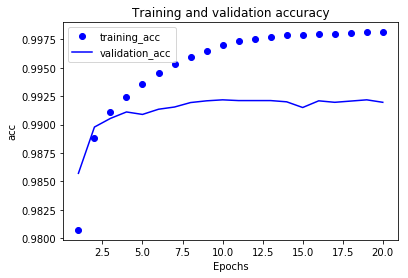

In [42]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values, "bo", label = "training_acc")
plt.plot(epochs,val_acc_values, "b", label = "validation_acc")
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [44]:
network.fit(x_train, y_one_hot_train, epochs = 9, batch_size = 512)

Epoch 1/9
8982/8982 [==============================] - 1s 80us/step - loss: 0.0078 - acc: 0.9975
Epoch 2/9
8982/8982 [==============================] - 1s 96us/step - loss: 0.0066 - acc: 0.9977
Epoch 3/9
8982/8982 [==============================] - 1s 92us/step - loss: 0.0059 - acc: 0.9978
Epoch 4/9
8982/8982 [==============================] - 1s 93us/step - loss: 0.0053 - acc: 0.9979
Epoch 5/9
8982/8982 [==============================] - 1s 89us/step - loss: 0.0051 - acc: 0.9980
Epoch 6/9
8982/8982 [==============================] - 1s 93us/step - loss: 0.0049 - acc: 0.9980
Epoch 7/9
8982/8982 [==============================] - 1s 92us/step - loss: 0.0046 - acc: 0.9981
Epoch 8/9
8982/8982 [==============================] - 1s 87us/step - loss: 0.0045 - acc: 0.9980
Epoch 9/9
8982/8982 [==============================] - 1s 91us/step - loss: 0.0045 - acc: 0.9981


In [45]:
results = network.evaluate(x_test,y_one_hot_test)

2246/2246 [==============================] - 0s 91us/step


In [46]:
results

[0.04138668897899261, 0.9913469452148872]

In [30]:
y_test_pred = network.predict(x_test)

In [37]:
decoded_review_1 = ' '.join([reverse_word_index.get(i-3,"?") for i in test_data[0]])
print(decoded_review_1)
print(y_test_pred[0])

? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
[0.01991177]
